In [4]:

import pandas as pd

df = pd.read_csv(r"/content/Synthetic_Loan_Default_Dataset.csv")
print(df.head())
df.shape

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  LN00000001   59   46927       93462          681             256   
1  LN00000002   49  136619       21763          670             300   
2  LN00000003   35   27684      123242          320              25   
3  LN00000004   63  195558      113863          328             339   
4  LN00000005   28   60172       91297          769              29   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... FamilySize  \
0              10         13.59        48      0.30  ...          5   
1               7         20.71        24      0.24  ...          8   
2              12         21.03        12      0.82  ...          6   
3               8          3.54        60      0.81  ...          9   
4              10         13.30        60      0.63  ...          8   

  DependentsCount PropertyType EmployerIndustry VehicleOwned  \
0               1    Apartment       Healthcare           No   
1               2 

(1000000, 40)

In [5]:
df.EmploymentType.unique()

array(['Part-time', 'Full-time', 'Unemployed', 'Self-employed'],
      dtype=object)

In [6]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'ResidenceType', 'BankAccountType', 'PrevDefaults', 'MissedPayments',
       'LoanApplicationChannel', 'Region', 'MobileVerified', 'EmailVerified',
       'AccountAgeMonths', 'IsGovernmentEmployee', 'HasCreditCard',
       'CreditCardLimit', 'CreditUtilization', 'FamilySize', 'DependentsCount',
       'PropertyType', 'EmployerIndustry', 'VehicleOwned',
       'HomeOwnershipDuration', 'RiskScore', 'CurrentDelinquencies',
       'TotalAccounts', 'Default'],
      dtype='object')

In [7]:
df['Default'].value_counts(normalize=True)

!python --version

!pip install imbalanced-learn

Python 3.11.13


In [8]:
import random
random.seed(42)
df['LoanID'] = range(1, len(df) + 1)
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,FamilySize,DependentsCount,PropertyType,EmployerIndustry,VehicleOwned,HomeOwnershipDuration,RiskScore,CurrentDelinquencies,TotalAccounts,Default
0,1,59,46927,93462,681,256,10,13.59,48,0.30,...,5,1,Apartment,Healthcare,No,7,0.87,0,10,1
1,2,49,136619,21763,670,300,7,20.71,24,0.24,...,8,2,Villa,Others,No,9,0.68,4,19,0
2,3,35,27684,123242,320,25,12,21.03,12,0.82,...,6,0,Villa,Healthcare,No,39,0.13,0,18,0
3,4,63,195558,113863,328,339,8,3.54,60,0.81,...,9,0,Villa,Education,No,14,0.23,4,7,0
4,5,28,60172,91297,769,29,10,13.30,60,0.63,...,8,3,Villa,Finance,Yes,25,0.06,2,17,0


In [9]:
df.Education.unique()

df_ohe = pd.get_dummies(df)

df_ohe.head()

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,FamilySize,DependentsCount,PropertyType,EmployerIndustry,VehicleOwned,HomeOwnershipDuration,RiskScore,CurrentDelinquencies,TotalAccounts,Default
0,1,59,46927,93462,681,256,10,13.59,48,0.30,...,5,1,Apartment,Healthcare,No,7,0.87,0,10,1
1,2,49,136619,21763,670,300,7,20.71,24,0.24,...,8,2,Villa,Others,No,9,0.68,4,19,0
2,3,35,27684,123242,320,25,12,21.03,12,0.82,...,6,0,Villa,Healthcare,No,39,0.13,0,18,0
3,4,63,195558,113863,328,339,8,3.54,60,0.81,...,9,0,Villa,Education,No,14,0.23,4,7,0
4,5,28,60172,91297,769,29,10,13.30,60,0.63,...,8,3,Villa,Finance,Yes,25,0.06,2,17,0


In [10]:


# Remove rows where 'Default' is NaN
df_ohe_clean = df_ohe.dropna(subset=['Default'])

# Reassign X and Y from the cleaned DataFrame
X = df_ohe_clean.drop(columns=['Default'])
Y = df_ohe_clean['Default']

In [11]:
"""# **Balancing Data**"""

# Step 2: Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [12]:

# Step 3: Combine resampled features and target variable into a new DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["Default"] = y_resampled

resampled_df.to_csv('Processed_data.csv', index=False)

resampled_df.head()

resampled_df['Default'].value_counts(normalize=True)
resampled_df.shape

(1600118, 73)

In [13]:
"""# **Feature Reduction**"""

# Ensure resampled_df exists and is the correct dataframe after SMOTE
# If resampled_df is not available, load it from 'Processed_data.csv'
try:
    resampled_df.head()
except NameError:
    resampled_df = pd.read_csv('Processed_data.csv')


X = resampled_df[['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']]
Y= resampled_df['Default']

X.shape,Y.shape

((1600118, 8), (1600118,))

In [14]:
# Step 3: Combine resampled features and target variable into a new DataFrame
final_df = pd.DataFrame(X, columns=X.columns)
final_df["Default"] = Y

final_df.head()

final_df.shape

final_df.to_csv('Selected_features.csv', index=False)
final_df.shape

(1600118, 9)

In [15]:
"""Feature_Importance.ipynb

"""

import pandas as pd
import numpy as np
import random

In [16]:
df = pd.read_csv('Synthetic_Loan_Default_Dataset.csv')
df.head()

df['LoanID'].nunique()

1000000

In [17]:
df.shape

df['LoanID'] = range(1, len(df) + 1)

df.head()

df['LoanID'].nunique()

df['Education'].replace(["Bachelor's", "Master's", 'High School', 'PhD'],[1,2,0,3])

df['Education'].unique()

df.isnull().sum()

/tmp/ipython-input-2222917111.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'].replace(["Bachelor's", "Master's", 'High School', 'PhD'],[1,2,0,3])


,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [18]:
#df.drop('LoanID',axis=1,inplace=True)

df_ohe = pd.get_dummies(df)
df_ohe.head()

df_ohe.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'PrevDefaults', 'MissedPayments', 'AccountAgeMonths',
       'CreditCardLimit', 'CreditUtilization', 'FamilySize', 'DependentsCount',
       'HomeOwnershipDuration', 'RiskScore', 'CurrentDelinquencies',
       'TotalAccounts', 'Default', 'Education_Bachelor's',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes',
       'ResidenceType_Mortgaged', 'ResidenceType

In [19]:


# Remove rows where 'Default' is NaN
df_ohe_clean = df_ohe.dropna(subset=['Default'])

# Reassign X and Y from the cleaned DataFrame
X = df_ohe_clean.drop(columns=['Default'],axis=1)
Y = df_ohe_clean['Default']


In [20]:
"""# TrainTest Split"""

from sklearn.model_selection import train_test_split

# Use the X and Y from the balanced and feature-selected data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7,stratify = Y)

X_train.head()

X_train.isnull().sum()

"""# **Getting Feature importance**

# APPLY DECISION TREE
"""

'# **Getting Feature importance**\n\n# APPLY DECISION TREE\n'

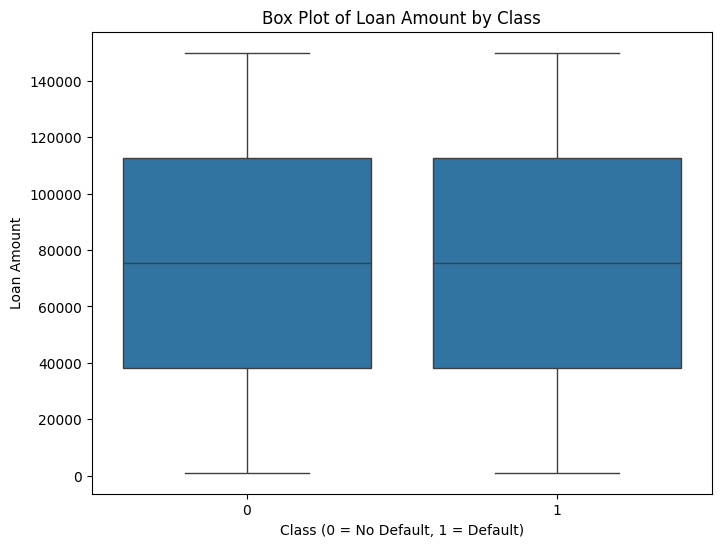

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert relevant Spark DataFrame columns to pandas Series
default_pandas = df["Default"]
loan_amount_pandas = df["LoanAmount"]


plt.figure(figsize=(8, 6))
sns.boxplot(x=default_pandas, y=loan_amount_pandas)
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

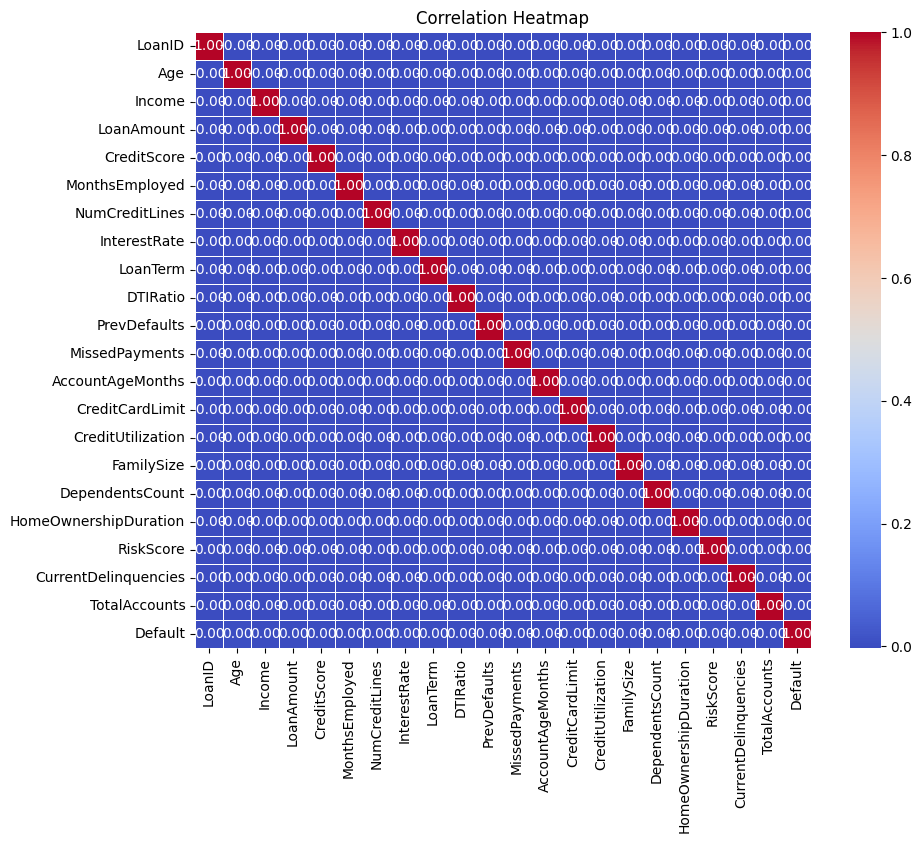

X_train shape: (800000, 8)
X_test shape: (200000, 8)
Y_train shape: (800000,)
Y_test shape: (200000,)


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Drop rows with NaNs and select numeric columns
numeric_df = df.select_dtypes(include=['number']).dropna()

# Step 2: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Define X and Y
X = numeric_df[['Age', 'Income', 'LoanAmount', 'CreditScore',
                'MonthsEmployed', 'InterestRate', 'DTIRatio', 'LoanTerm']]
Y = numeric_df['Default']

# Step 4: Train-test split (fix starts here)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2 ,random_state=42, stratify=Y
)

# Step 5: Show shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

In [30]:
"""# **Model Training Using SVM**"""

#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

file_path ="/content/Selected_features.csv"

In [31]:
# Create an DataFrame from file_path
df = spark.read.csv(file_path,header=True,inferSchema=True)

# Check the type of people_df
#print("The type of people_df is", type(people_df))

from pyspark.sql.functions import col
# Get the total count of records
total_count = df.count()

# Get the count of each class (0 and 1)
class_counts = df.groupBy("Default").count()
class_counts

DataFrame[Default: int, count: bigint]

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Step 1: Create Spark session
spark = SparkSession.builder \
    .appName("DefaultAnalysis") \
    .getOrCreate()

# Step 2: Load CSV into DataFrame
file_path = "/content/Processed_data.csv"  # Replace with your actual file path
df = spark.read.csv(file_path , header=True, inferSchema=True)

# Step 3: Print the DataFrame schema (optional)
df.printSchema()

# Step 4: Get total number of records
total_count = df.count()
print(f"Total number of records: {total_count}")

# Step 5: Get count of each class in 'Default' column
class_counts = df.groupBy("Default").count()
print("Class counts:")
class_counts.show()

# Step 6: Show percentage distribution of each class
class_distribution = class_counts.withColumn(
    "Percentage", (col("count") / total_count) * 100
)
print("Class distribution (with percentages):")
class_distribution.show()


root
 |-- LoanID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- MonthsEmployed: integer (nullable = true)
 |-- NumCreditLines: integer (nullable = true)
 |-- InterestRate: double (nullable = true)
 |-- LoanTerm: integer (nullable = true)
 |-- DTIRatio: double (nullable = true)
 |-- PrevDefaults: integer (nullable = true)
 |-- MissedPayments: integer (nullable = true)
 |-- AccountAgeMonths: integer (nullable = true)
 |-- CreditCardLimit: integer (nullable = true)
 |-- CreditUtilization: double (nullable = true)
 |-- FamilySize: integer (nullable = true)
 |-- DependentsCount: integer (nullable = true)
 |-- HomeOwnershipDuration: integer (nullable = true)
 |-- RiskScore: double (nullable = true)
 |-- CurrentDelinquencies: integer (nullable = true)
 |-- TotalAccounts: integer (nullable = true)
 |-- Education_Bachelor's: boolean (nullable = true)

In [33]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, when

In [34]:
feature_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']
target_col = 'Default'

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(df)

In [35]:
from xgboost import XGBClassifier

# Re-fit the model on the entire training data
model = XGBClassifier(eval_metric='logloss')

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

model.fit(X_train, Y_train)

print(X_train.shape)
print(y_train.shape)


Shape of X_train: (800000, 8)
Shape of y_train: (800000,)
(800000, 8)
(800000,)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

# ✅ 1. Assuming you already have a cleaned DataFrame:
# From previous steps:
# X, Y = feature matrix and target
# Make sure you re-split if needed

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# ✅ 2. Train the RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight="balanced",  # Helps if classes are slightly imbalanced
    n_jobs=-1
)
model.fit(X_train, Y_train)

# ✅ 3. Evaluate the model
predictions = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print("\n🔍 Classification Report:")
print(classification_report(Y_test, predictions))

print("📉 Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print(f"🎯 ROC AUC Score: {roc_auc_score(Y_test, probs):.4f}")

# ✅ 4. Save the model to disk
# joblib.dump(model, "rf_model_project.pkl")
# print("\n✅ Model saved as rf_model_project.pkl")



🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    160012
           1       1.00      0.00      0.00     39988

    accuracy                           0.80    200000
   macro avg       0.90      0.50      0.44    200000
weighted avg       0.84      0.80      0.71    200000

📉 Confusion Matrix:
[[160012      0]
 [ 39987      1]]
🎯 ROC AUC Score: 0.5011


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assume X and Y are your features and target variable (same as before)

# Split the data (stratified like before)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# ===== Logistic Regression =====
logreg = LogisticRegression(
    class_weight="balanced",    # Handles mild-moderate imbalance
    max_iter=1000,              # Ensures convergence
    random_state=42,
    n_jobs=-1
)
logreg.fit(X_train, Y_train)

logreg_pred = logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)[:, 1]

print("\n=== Logistic Regression Results ===")
print(classification_report(Y_test, logreg_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, logreg_pred))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(Y_test, logreg_proba)))

# ===== Support Vector Classifier (SVC) =====
# SVC works best with scaled data!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Logistic Regression Results ===
              precision    recall  f1-score   support

           0       0.80      0.43      0.56    160012
           1       0.20      0.57      0.30     39988

    accuracy                           0.46    200000
   macro avg       0.50      0.50      0.43    200000
weighted avg       0.68      0.46      0.50    200000

Confusion Matrix:
 [[68349 91663]
 [17077 22911]]
ROC AUC Score: 0.4992


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use probability=True for ROC AUC (slower, but gives predict_proba)
svc = SVC(
    kernel='rbf',
    class_weight="balanced",
    random_state=42,
    probability=True
)
svc.fit(X_train_scaled, Y_train)

svc_pred = svc.predict(X_test_scaled)
svc_proba = svc.predict_proba(X_test_scaled)[:, 1]

print("\n=== Support Vector Classifier Results ===")
print(classification_report(Y_test, svc_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, svc_pred))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(Y_test, svc_proba)))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# 1. Prepare Feature Matrix (X) and Target Array (Y)
#    Ensure that your data is cleaned and preprocessed before this step.
# ===============================

# For example:
# X = df.drop('target', axis=1)
# Y = df['target']

# ===============================
# 2. Train/Test Split (Stratified to maintain class ratio)
# ===============================

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# ===============================
# 3. Handle Imbalanced Classes with SMOTE
#    SMOTE oversamples the minority class in the training set ONLY
# ===============================

smote = SMOTE(random_state=42)
X_train_bal, Y_train_bal = smote.fit_resample(X_train, Y_train)

# ===============================
# 4. (Optional) Feature Scaling
#    Scaling is optional for Random Forest but can help if variables
#    have very different scales. Required for other models like SVC.
# ===============================

scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)

# ===============================
# 5. Hyperparameter Optimization with RandomizedSearchCV
#    Improve model by searching over different values.
# ===============================

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2', 0.5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],
    'random_state': [42]
}

base_clf = RandomForestClassifier(n_jobs=-1)
rs = RandomizedSearchCV(
    estimator=base_clf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rs.fit(X_train_bal, Y_train_bal)

model = rs.best_estimator_  # Use the best found model

# ===============================
# 6. Evaluate Model on Test Set
#    Assess with several metrics (classification report, confusion matrix, ROC AUC)
# ===============================

predictions = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print("\n🔍 Classification Report:")
print(classification_report(Y_test, predictions))

print("📉 Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print(f"🎯 ROC AUC Score: {roc_auc_score(Y_test, probs):.4f}")

print("\nBest Hyperparameters Found:\n", rs.best_params_)

# ===============================
# 7. Feature Importance Plot (Optional)
# ===============================

if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns
    else:
        feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_importances)), feature_importances[indices])
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Assuming y_test and predictions (from the scikit-learn model) are available from previous cells

# Evaluate the model using scikit-learn metrics
print("\n🔍 Classification Report:")
print(classification_report(Y_test, predictions))

print("📉 Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

# Calculate ROC AUC Score (requires probabilities)
# Make sure you have predicted probabilities available, e.g., from model.predict_proba(X_test)
# If you don't have probabilities, you might need to re-run the prediction step to get them.
try:
    # Assuming 'probs' variable with predicted probabilities exists from cell 82N8mRiDghlL
    print(f"🎯 ROC AUC Score: {roc_auc_score(Y_test, probs):.4f}")
except NameError:
    print("Predicted probabilities ('probs') not found. Cannot calculate ROC AUC score.")
    print("Please ensure model.predict_proba(X_test) was run and stored in a 'probs' variable.")

In [ ]:
import numpy as np
import joblib
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# ✅ Load trained model
model = joblib.load("rf_model.pkl")  # Your trained RandomForestClassifier

# ✅ Define input type: (batch_size, num_features)
initial_type = [('float_input', FloatTensorType([None, 8]))]  # 8 features

# ✅ Convert to ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type)

# ✅ Save the ONNX model
with open("rf_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("✅ Model converted and saved as rf_model.onnx")


In [ ]:
df.groupBy("Default").count().show()

In [ ]:
y_pred = model.predict(X_test)

# Save test labels and predictions
joblib.dump(y_test, "y_test_project.pkl")
joblib.dump(y_pred, "y_pred_project.pkl")